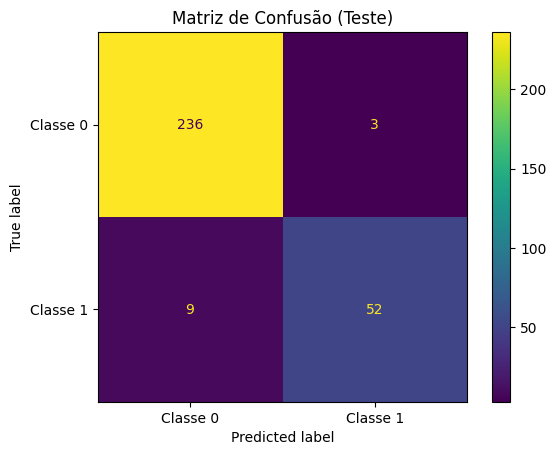

/home/thiago/.cache/pypoetry/virtualenvs/curso-aprendizado-YJkHWjyy-py3.12/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


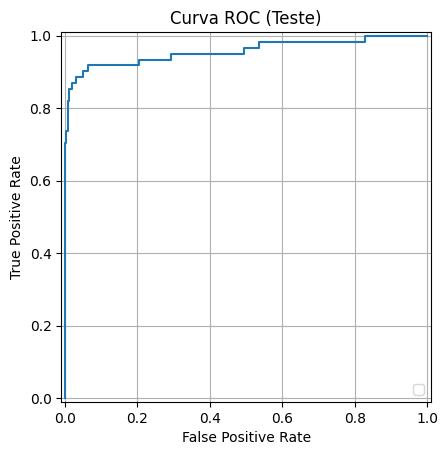

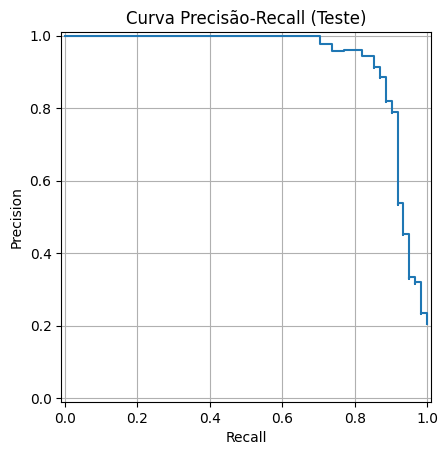

In [3]:
# Importações
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay,
)
from sklearn.model_selection import train_test_split

# Gerar dados artificiais desbalanceados
X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_redundant=3,
    n_informative=2,
    n_clusters_per_class=1,
    weights=[0.8, 0.2],
    random_state=0
)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

# Treinar modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Classe 0", "Classe 1"]).plot()
plt.title("Matriz de Confusão (Teste)")
plt.grid(False)
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("Curva ROC (Teste)")
plt.grid(True)
plt.show()

# Curva Precisão-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title("Curva Precisão-Recall (Teste)")
plt.grid(True)
plt.show()


In [6]:
# Note que y_proba é a probabilidade da classe 1
y_proba

array([3.53580176e-03, 3.27524711e-02, 1.39252807e-03, 1.09900268e-01,
       5.10793119e-05, 2.62697125e-03, 9.29892607e-01, 3.95843498e-05,
       7.70149970e-02, 2.83542137e-01, 2.66067345e-02, 3.15129678e-01,
       6.44874699e-01, 8.74491881e-04, 1.32158660e-02, 9.97210637e-01,
       4.03106389e-05, 4.66243343e-02, 5.21042248e-03, 7.86865625e-02,
       7.51912899e-01, 2.41763102e-02, 2.06023788e-03, 8.07828197e-01,
       8.79521491e-03, 3.07545245e-02, 5.67122909e-01, 6.81611783e-02,
       9.92447591e-01, 9.96241677e-01, 9.96061664e-01, 5.21294964e-02,
       2.55242034e-02, 3.45364064e-03, 7.94691594e-02, 4.73352117e-02,
       1.13828176e-02, 6.81022537e-05, 1.40449810e-01, 2.51749469e-02,
       4.14583511e-01, 4.81223637e-03, 9.34862806e-01, 3.49718480e-01,
       2.91502084e-02, 1.21598774e-02, 7.89634640e-03, 8.66310668e-02,
       7.43649145e-01, 1.08940869e-01, 1.45640756e-02, 1.61492475e-02,
       1.85632234e-03, 9.62959280e-01, 5.85608566e-03, 1.34443718e-01,
      

## Cálculo das métricas de desempenho para t=.5

In [4]:
# Extrair valores da matriz de confusão
tn, fp, fn, tp = cm.ravel()

# Calcular métricas manualmente
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

recall, precision, f1


(np.float64(0.8524590163934426),
 np.float64(0.9454545454545454),
 np.float64(0.8965517241379309))

## Cálculo das métricas para outros limiares

In [10]:
# Definir novo limiar de decisão
novo_limiar = 0.9

# Nova predição com limiar ajustado
y_pred_novo = (y_proba >= novo_limiar).astype(int)

# Nova matriz de confusão
cm_novo = confusion_matrix(y_test, y_pred_novo)
tn_n, fp_n, fn_n, tp_n = cm_novo.ravel()

# Recalcular métricas
recall_n = tp_n / (tp_n + fn_n) if (tp_n + fn_n) > 0 else 0
precision_n = tp_n / (tp_n + fp_n) if (tp_n + fp_n) > 0 else 0
f1_n = 2 * precision_n * recall_n / (precision_n + recall_n) if (precision_n + recall_n) > 0 else 0

cm_novo, recall_n, precision_n, f1_n


(array([[239,   0],
        [ 23,  38]]),
 np.float64(0.6229508196721312),
 np.float64(1.0),
 np.float64(0.7676767676767677))